In [1]:
import networkx as nx
from itertools import chain
from collections import Counter
import ast
import matplotlib.pyplot as plt

In [2]:
draw_options = {
    'node_color': 'blue', 'node_size': 100, 'width': 3,
    'arrowstyle': '-|>', 'arrowsize': 12,
}

In [3]:
g = nx.readwrite.graphml.read_graphml('./full_20180709_gml')

In [5]:
for i in g.edges():
    if len(i) != 2:
        print(i)
        continue
    if type(i[0]) != str or type(i[1]) != str:
        print(i)

In [7]:
def parallelEdge(g):
    eSize = []
    countEdge = 0
    for i in g.edges():
        c = len(g[i[0]][i[1]])
        countEdge += c
        eSize.append(c)
    return Counter(eSize), countEdge
multiEdgeC, totalEdge = parallelEdge(g)
print(multiEdgeC)
print(totalEdge)

Counter({1: 55216, 2: 1098, 3: 27})
57493


In [4]:
gSimple = nx.DiGraph(g.to_directed())

In [6]:
print(type(g))
print(type(gSimple))
print("Edge: " + str(g.number_of_edges()))
print("Node: " + str(g.number_of_nodes()))
print("Edge: " + str(gSimple.number_of_edges()))
print("Node: " + str(gSimple.number_of_nodes()))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'networkx.classes.digraph.DiGraph'>
Edge: 56341
Node: 20930
Edge: 55774
Node: 20930


> Get useable attributes

In [8]:
def getNodeAttrib(g):
    return set(chain(*[(g.node[n].keys()) for n in g.nodes()]))
def getEdgeAttrib(g):
    return set(chain(*[(g.edges[i[0],i[1],0].keys()) for i in g.edges()]))

In [9]:
print("Node: " , getNodeAttrib(g))
print("Edge: " , getEdgeAttrib(g))

Node:  {'osmid', 'x', 'lat', 'ref', 'lon', 'y', 'highway'}
Edge:  {'osmid', 'name', 'ref', 'width', 'oneway', 'maxspeed', 'junction', 'length', 'tunnel', 'highway', 'geometry', 'access', 'lanes', 'service', 'bridge'}


> Extract edges with attribute 'bridge' is true

In [12]:
def extractBridges(g):
    bridge_nodes = []
    for e in g.edges():
        from_ = e[0]
        to_ = e[1]
        test_edge = g[from_][to_]
        if 'bridge' in test_edge and test_edge['bridge'] == 'yes':
            bridge_nodes.append(from_)
            bridge_nodes.append(to_)
    return g.subgraph(bridge_nodes).copy()

g_bridge = extractBridges(gSimple)

In [13]:
print(type(g_bridge))
print("Edge: " + str(g_bridge.number_of_edges()))
print("Node: " + str(g_bridge.number_of_nodes()))

<class 'networkx.classes.digraph.DiGraph'>
Edge: 870
Node: 694


> Find names for all 'bridges'

In [21]:
# Unique bridge names
def findUniqueNames(g):
    tmpAll = {}
    for e in g.edges():
        test_edge = g[e[0]][e[1]]
        # Default 'noname' routine
        tmp_name = '[Unnamed]'
        if 'name' in test_edge:
            tmp_name = test_edge['name']
            if '[' and ']' in tmp_name:
                # Parse list and sort to guarantee order
                tmp_name = ast.literal_eval(tmp_name).sort()
        dictKeyName = str(tmp_name)
        if dictKeyName not in tmpAll:
            tmpAll[dictKeyName] = []
        tmpAll[dictKeyName].append((e[0],e[1]))
    return tmpAll, tmpAll.keys()
allEdgeByName, uniqueNames = findUniqueNames(g_bridge)
uniqueNames

dict_keys(['Chestnut Street', 'Allegheny Valley Expressway', '[Unnamed]', 'Fort Duquesne Bridge', 'One Wild Place', 'Schenley Drive', 'Penn Avenue', 'Palm Garden Trestle', 'Skid Way', 'Penn-Lincoln Parkway East', 'Highland Park Bridge', 'Timberland Avenue', 'Crosstown Boulevard', 'None', '28th Street Bridge', 'Butler Street', 'East Busway', 'Freeport Road', 'Boulevard of the Allies', 'Washington Boulevard', 'Meadow Street', '62nd Street Bridge', 'Negley Run Boulevard', 'East Liberty Boulevard', 'Saw Mill Run Boulevard', 'West North Avenue', '26th Street Ramp', 'Arlington Avenue', 'P J McArdle Roadway', 'Forbes Avenue', 'Lincoln Avenue', 'Center Street', 'William Flinn Highway', 'Ansonia Place', 'McNeilly Road', 'Library Road', 'Penn-Lincoln Parkway North', 'Panther Hollow Road', 'West Carson Street', 'Bajo Street', 'MacFarren Street', 'Liberty Bridge', 'Liberty Tunnels', 'Smithfield Street', 'Fort Pitt Boulevard', 'Laurel Street', 'West End Bridge', 'Ridge Place', 'Ramp Street', 'Edgew

In [51]:
def addPseudoEdge(g, uid, from_1, to_1, from_2, to_2):
    nodeName = "pseudo_" + str(uid)
    oriEdgeLeft = g[from_1][to_1]
    oriEdgeRight = g[from_2][to_2]
    newLeftName = 'Unnamed'
    newRightName = 'Unnamed'
    if 'name' in oriEdgeLeft:
        newLeftName = oriEdgeLeft['name']
    if 'name' in oriEdgeRight:
        newRightName = oriEdgeRight['name']
    g.add_node(nodeName, note="Fake")
    # Notice the direction
    g.add_edge(from_1, nodeName, name = (newLeftName + "_p1"))
    g.add_edge(nodeName, to_1, name = (newLeftName + "_p2"))
    g.add_edge(from_2, nodeName, name = (newRightName + "_p1"))
    g.add_edge(nodeName, to_2, name = (newRightName + "_p1"))
    # Remove old edge
    g.remove_edge(from_1, to_1)
    g.remove_edge(from_2, to_2)

---
> Below are useless code

In [ ]:
c = 0
for e in g.edges(data=all):
    c+=1
    print("%s,%s" % (e[0],e[1]))
    if c>2:
        break


In [ ]:
g['683704708']['275755069'][0]

In [ ]:
s = g['104185739']['105697570']
for i in s:
    print(s[i])

In [ ]:
g.nodes['104551796']

In [ ]:
#nx.draw_networkx(g, arrows=True, **draw_options)

---
> Below are proto-code

In [57]:
allEdgeByName['Veterans Bridge']

[('684861957', '684844042'),
 ('684907711', '684861957'),
 ('684861842', '684907553'),
 ('684844055', '684861842')]

In [58]:
tmp_g = g_bridge.subgraph(['684861957', '684844042','684907711', '684861957','684861842', '684907553','684844055', '684861842']).copy()

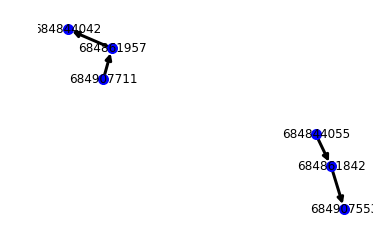

In [59]:
fig = plt.figure()
plt.axis('off')
nx.draw_networkx(tmp_g, arrows=True, **draw_options)

In [60]:
for e in tmp_g.edges():
    from_ = e[0]
    to_ = e[1]
    print("%s,%s" % (from_,to_))

684844055,684861842
684907711,684861957
684861957,684844042
684861842,684907553


In [61]:
addPseudoEdge(tmp_g, 1, '684907711', '684861957', '684844055', '684861842')
addPseudoEdge(tmp_g, 2, '684861957', '684844042', '684861842', '684907553')

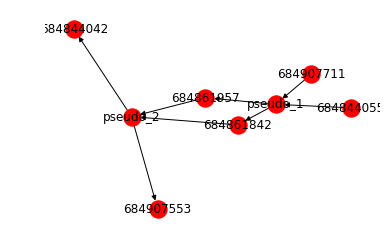

In [62]:
fig = plt.figure()
plt.axis('off')
nx.draw_networkx(tmp_g, arrows=True)

In [63]:
for e in tmp_g.edges():
    from_ = e[0]
    to_ = e[1]
    print("%s,%s" % (from_,to_))

684844055,pseudo_1
684907711,pseudo_1
684861957,pseudo_2
684861842,pseudo_2
pseudo_1,684861957
pseudo_1,684861842
pseudo_2,684844042
pseudo_2,684907553
